In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model #algoritmos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os
from google.colab import files
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
# Verifica se o arquivo já foi carregado
if 'preco_imoveis.xlsx' not in os.listdir():
    # Faz upload apenas uma vez
    uploaded = files.upload()
else:
    print("Arquivo já carregado.")

Arquivo já carregado.


In [ ]:
# 1. Alocar dataset
df = pd.read_excel("preco_imoveis.xlsx") #leitura dos dados
#df = pd.read_csv("dados_wgs.csv")


In [ ]:
#df.head() #cabeçalho do dataset
df.info() #informações do dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2257 non-null   int64  
 1   valor_total       2257 non-null   int64  
 2   unit              2257 non-null   float64
 3   area_util         2257 non-null   int64  
 4   quartos           2257 non-null   int64  
 5   vagas             2257 non-null   int64  
 6   condominio        2257 non-null   int64  
 7   suites            2257 non-null   int64  
 8   banheiros         2257 non-null   int64  
 9   piscina           2257 non-null   int64  
 10  academia          2257 non-null   int64  
 11  quadra            2257 non-null   int64  
 12  bairro            2257 non-null   int64  
 13  media_bairro      2257 non-null   float64
 14  qtd_dados_bairro  2257 non-null   int64  
 15  media_idh         2257 non-null   float64
 16  media_gini        2257 non-null   float64


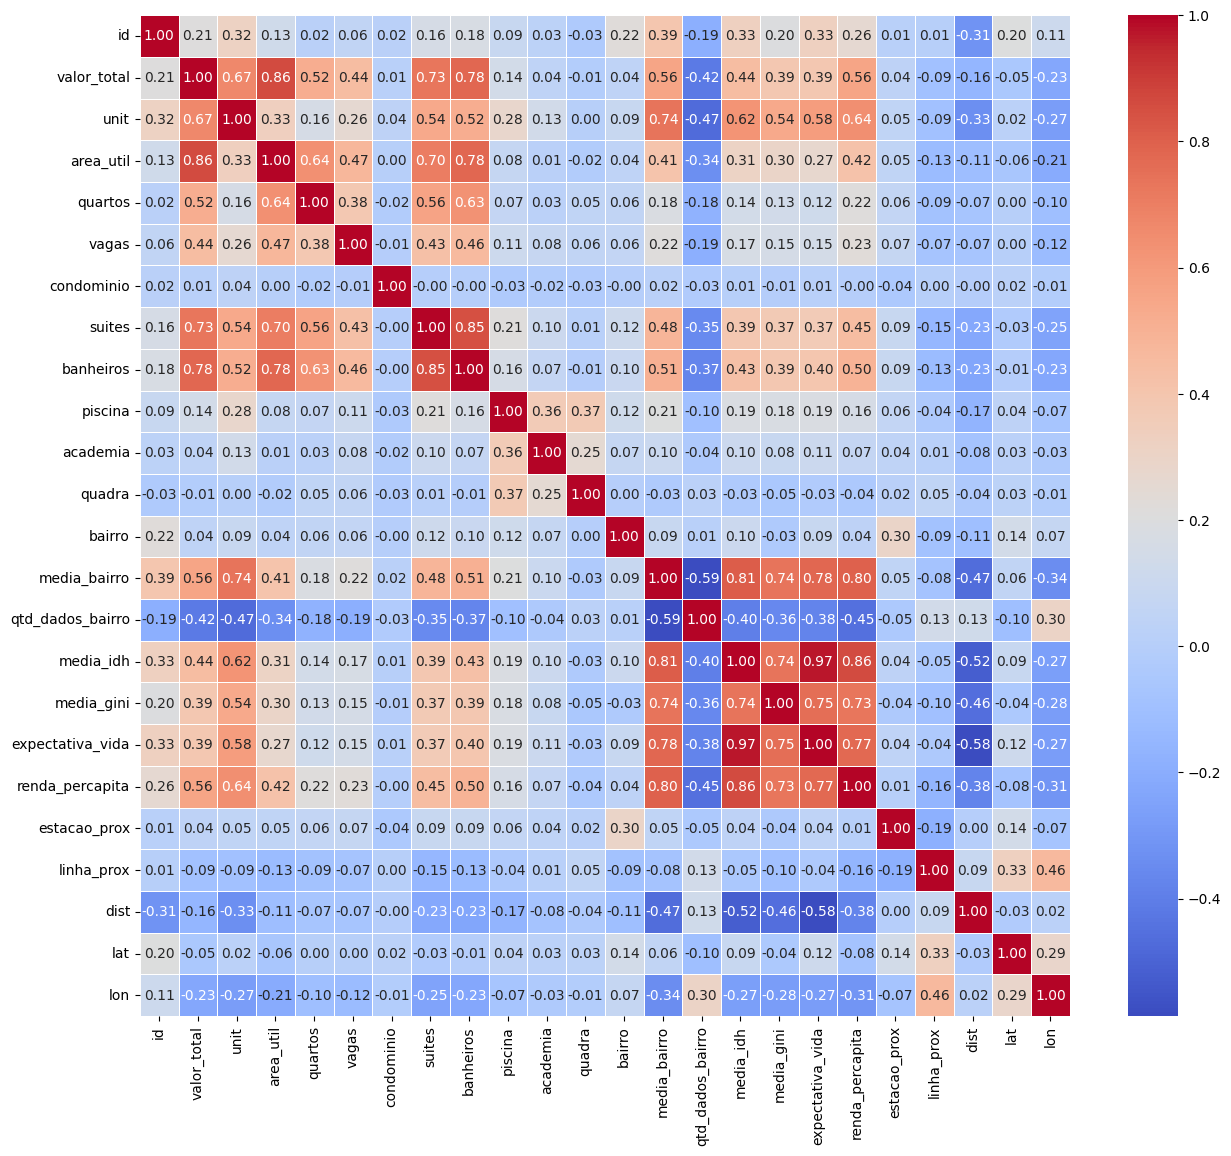

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Definir o tamanho da figura
plt.figure(figsize=(15, 13))

# Criar um heatmap da matriz de correlação com anotações
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Exibir o gráfico
plt.show()

In [ ]:
# Filtrar as features com correlação acima de 0.5 com a coluna 'valor_total'
high_correlation_features = correlation_matrix['valor_total'][correlation_matrix['valor_total'] > 0.5]

# Exibir as colunas com correlação acima de 0.5
print(high_correlation_features)

valor_total        1.000000
unit               0.665555
area_util          0.857714
quartos            0.519799
suites             0.730031
banheiros          0.778592
media_bairro       0.560074
renda_percapita    0.555266
Name: valor_total, dtype: float64


In [ ]:
X = df[['unit', 'area_util', 'quartos', 'suites', 'banheiros', 'media_bairro', 'renda_percapita']] #valores do df para prever um valor x
y = df[['valor_total']]

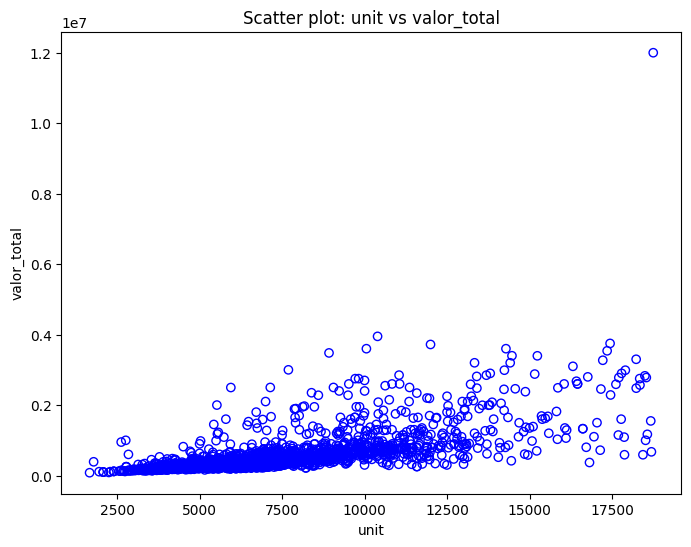

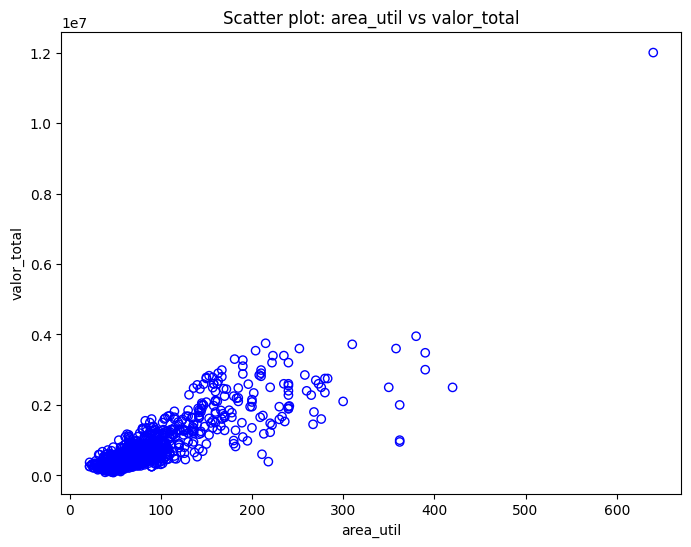

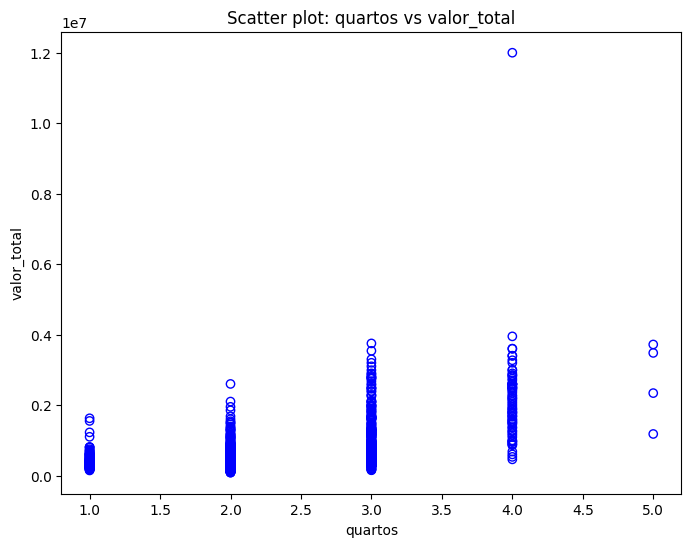

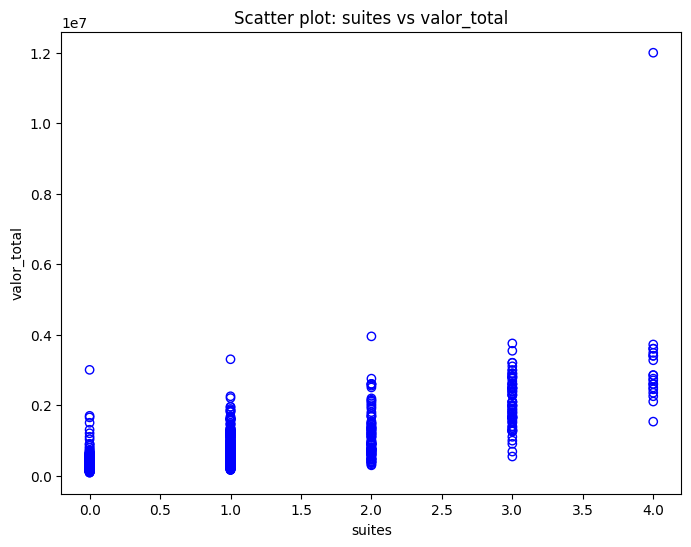

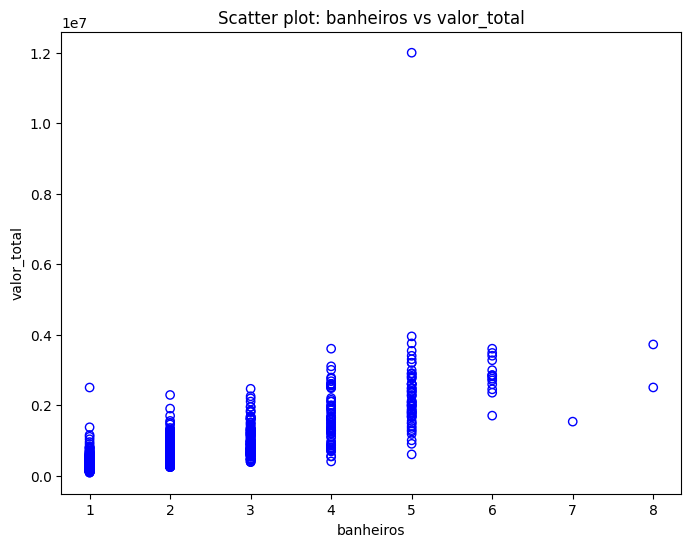

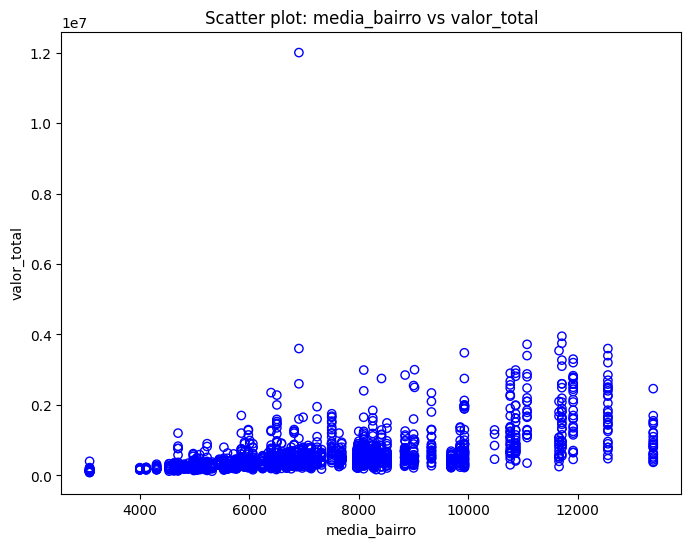

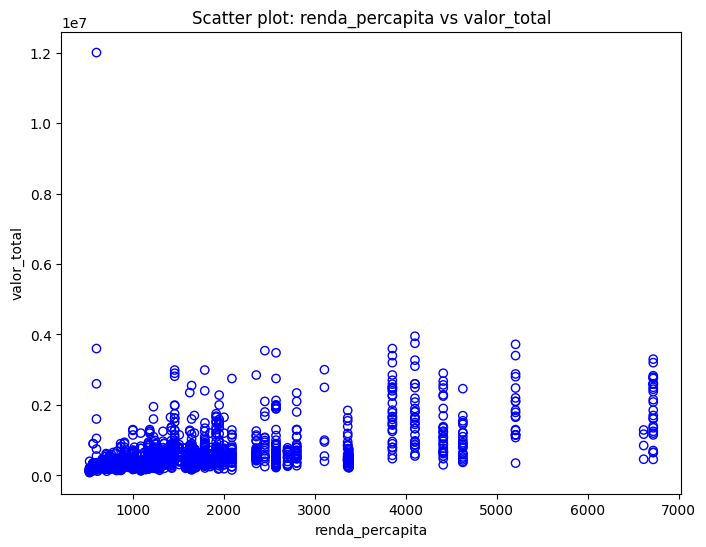

In [ ]:
# Gerar gráficos de dispersão para cada feature em X
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, facecolors='none', edgecolors='blue')  # facecolors='none' remove o preenchimento
    plt.xlabel(feature)
    plt.ylabel("valor_total")
    plt.title(f"Scatter plot: {feature} vs valor_total")
    plt.show()

In [ ]:
# 6. Dividir o dataset atualizado em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=16)



In [ ]:
# 2. Criar o modelo de regressão linear com o dataset inteiro para o calculo de SSE
modelo_limpo = linear_model.LinearRegression()
modelo_limpo.fit(X_treino, y_treino) #treina o modelo

LinearRegression()

In [ ]:

# previsões no conjunto de teste
y_pred_teste = modelo_limpo.predict(X_teste)

# previsões no conjunto de teste
y_pred_treino = modelo_limpo.predict(X_treino)

In [ ]:
# intercepto e inclinação(coeficiente angular)
intercepto = modelo_limpo.intercept_[0]
inclinacao = modelo_limpo.coef_[0][0]

print(f"Intercepto: {intercepto}")
print(f"Inclinação: {inclinacao}")

Intercepto: -593853.343258909
Inclinação: 99.21942820072935


In [ ]:
# calcular as métricas no conjunto de teste
SSE = np.sum((y_teste - y_pred_teste) ** 2)
MSE = mean_squared_error(y_teste, y_pred_teste)
MAE = mean_absolute_error(y_teste, y_pred_teste)
RMSE = np.sqrt(MSE)
R2_val = r2_score(y_teste, y_pred_teste)
R2_train = r2_score(y_treino, y_pred_treino)

# exibir as métricas
print(f"Soma dos Erros ao Quadrado (SSE): {SSE}")
print(f"Erro Quadrático Médio (MSE): {MSE}")
print(f"Erro Médio Absoluto (MAE): {MAE}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {RMSE}")
print(f"R2-score teste: {R2_val}") #% de predict pelo modelo criado
print(f"R2-score treino: {R2_train}")     #a distância entre as metricas não podem ser maiores do que 5%


Soma dos Erros ao Quadrado (SSE): valor_total    1.059855e+13
dtype: float64
Erro Quadrático Médio (MSE): 18758486832.40079
Erro Médio Absoluto (MAE): 84364.95223459016
Raiz do Erro Quadrático Médio (RMSE): 136961.6254006968
R2-score teste: 0.923572217485875
R2-score treino: 0.8985971654642393


In [ ]:
# Solicita que o usuário insira as features necessárias
preco_m2 = float(input("Digite o preço do m²: "))  # nova feature
area_util = float(input("Digite a área útil: "))
quartos = int(input("Digite o número de quartos: "))
suites = int(input("Digite o número de suítes: "))
banheiros = int(input("Digite o número de banheiros: "))
media_bairro = float(input("Digite a média do bairro: "))
renda_percapita = float(input("Digite a renda per capita: "))

# Formata a entrada para ser utilizada no modelo
entrada = [[preco_m2, area_util, quartos, suites, banheiros, media_bairro, renda_percapita]]

# Realiza a previsão do valor total
previsao = modelo_limpo.predict(entrada)  # Isso retornará um array

# Acessa o valor do array e converte para float, caso seja um array multidimensional
valor = float(previsao[0])  # Converte o valor previsto para float

# Formata o valor para duas casas decimais e separadores de milhar
resultado_formatado = f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

# Exibe o resultado formatado
print(f"Valor total previsto: {resultado_formatado}")


Digite o preço do m²: 10222.22
Digite a área útil: 45
Digite o número de quartos: 1
Digite o número de suítes: 0
Digite o número de banheiros: 1
Digite a média do bairro: 10478.2
Digite a renda per capita: 6616.06
Valor total previsto: R$ 537.961,25
